# CLASS runtime analysis

Boltzmann codes are the usually slowest part of a large scale structure cosmology analysis. However, the actual time it takes to run these routines is dependent on how they are configured. Particularly, the maximum wavenumber $k_{\rm max}$ they must compute (i.e. how deep into the non-linear regime) usually dictates how long the code takes to run. Therefore, the actual need for a Boltzmann code emulator is motivated by how this runtime scales.

In this notebook, we will see how the runtime of CLASS depends on $k_{\rm max}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
from classy import Class
%matplotlib inline

In [2]:
plt.rc("font", size=14, family="serif")
plt.rc("text", usetex=True)

In [3]:
#Step 1: define a cosmological model via a CLASS input dictionary
#Some assumed cosmological paramters and defaults in the class dictionary
Ob = 0.05
class_dict = {"h":0.7, "n_s":0.96, "Omega_b":0.05, "Omega_cdm": 0.25, "A_s": 2.0e-9,
              'z_max_pk':1.0, 'output': 'mPk', 'non linear':'halofit'}
cosmo = Class()

In [4]:
#Step 2: define a function that loop over ks, times a few cosmo.computes() and returns the times
def test_function():
    cosmo.compute()

def get_time(kmax, number=10):
    class_dict['P_k_max_h/Mpc'] = kmax
    cosmo.set(class_dict)
    return timeit.timeit("test_function()", number=number, setup="from __main__ import test_function")

In [5]:
log10kmaxes = np.linspace(0, 3, 20)
kmaxes = 10**log10kmaxes
times = np.zeros_like(log10kmaxes)
number = 10
for i, kmax in enumerate(kmaxes):
    times[i] = get_time(kmax, number)
    print("log10kmax = %.1e,   time/%d = %.4f"%(kmax, number, times[i]))

log10kmax = 1.0e+00,   time/10 = 0.6249
log10kmax = 1.4e+00,   time/10 = 0.5985
log10kmax = 2.1e+00,   time/10 = 0.6220
log10kmax = 3.0e+00,   time/10 = 0.5941
log10kmax = 4.3e+00,   time/10 = 0.5718
log10kmax = 6.2e+00,   time/10 = 0.5720
log10kmax = 8.9e+00,   time/10 = 0.6206
log10kmax = 1.3e+01,   time/10 = 0.6783
log10kmax = 1.8e+01,   time/10 = 0.8435
log10kmax = 2.6e+01,   time/10 = 1.1052
log10kmax = 3.8e+01,   time/10 = 1.2645
log10kmax = 5.5e+01,   time/10 = 1.8423
log10kmax = 7.8e+01,   time/10 = 2.2000
log10kmax = 1.1e+02,   time/10 = 3.2626
log10kmax = 1.6e+02,   time/10 = 4.0940
log10kmax = 2.3e+02,   time/10 = 6.7235
log10kmax = 3.4e+02,   time/10 = 10.6166
log10kmax = 4.8e+02,   time/10 = 13.6865
log10kmax = 7.0e+02,   time/10 = 21.7474
log10kmax = 1.0e+03,   time/10 = 27.1973


Text(0,0.5,'Computation time [sec]')

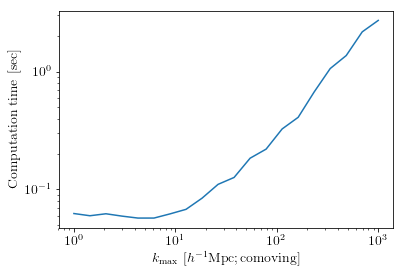

In [6]:
plt.loglog(kmaxes, times/number)
plt.xlabel(r"$k_{\rm max}\ [h^{-1}{\rm Mpc; comoving}]$")
plt.ylabel(r"Computation time [sec]")

## Significant runtime

As we see here, CLASS (and probably CAMB as well), become costly to run once $k_{\rm max}\approx 1e3$. This is the scale usually required to get sub-1% conversion on quantities such as the matter-matter correlation function. Thus, a Boltzmann emulator is desirable.

### Note - parallelism

CLASS as ran here is probably not parallelised, and other machines will very likely have more cores available than the laptop this was run on. The affect of parallelising a Boltzmann code is to shift the blue curve in the plot above down by a factor of $\sim N_{\rm cores}$.